In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset URL
url = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/listings.csv"

# Load data
data = pd.read_csv(url)

# View column names
data.columns


<ipython-input-1-d77cee519725>:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Question 1: What is the average price of accommodations in different neighborhoods?






<ipython-input-2-71e186c5a3f5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=clean_data_q1, ci=None)


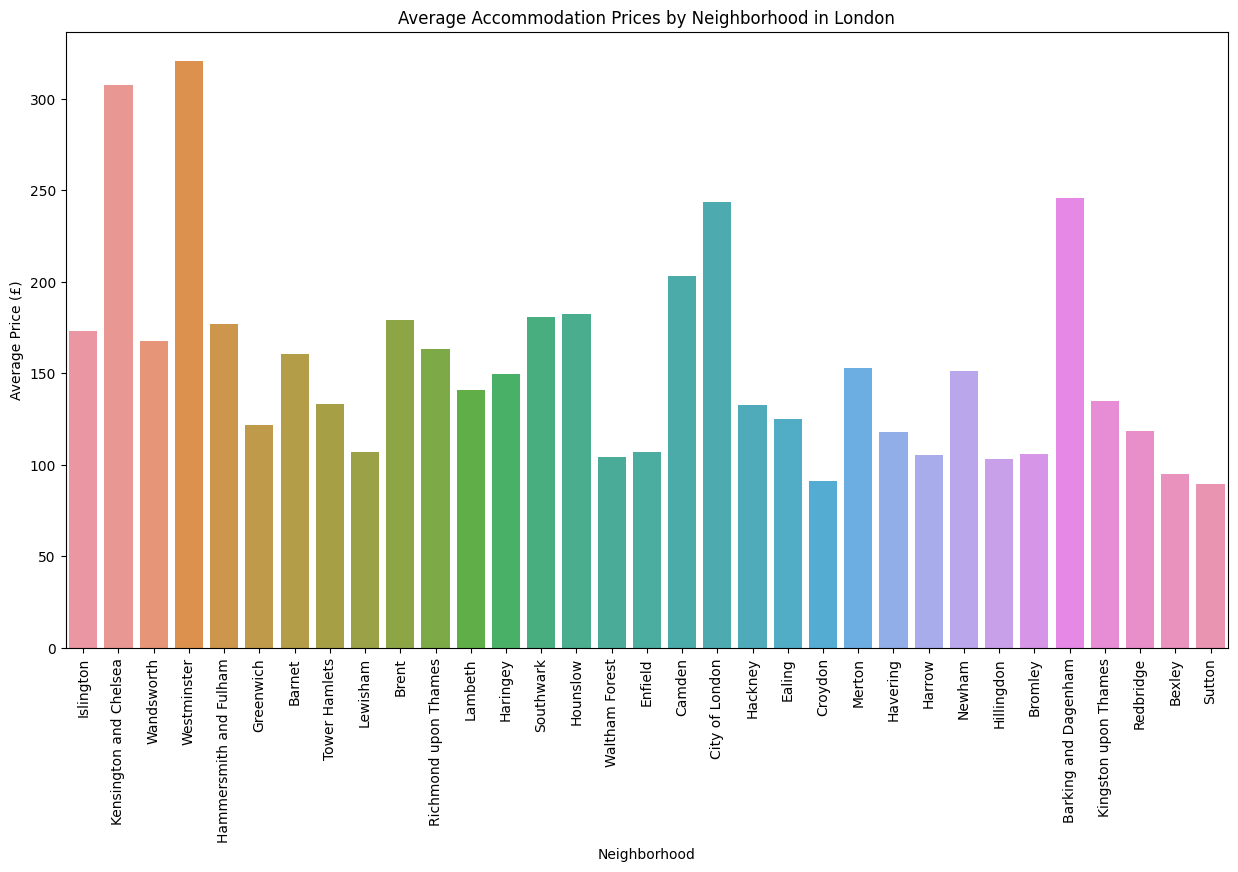

In [2]:
# Select relevant columns
clean_data_q1 = data[['neighbourhood', 'price']].dropna()

# Plot settings for better readability
plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood', y='price', data=clean_data_q1, ci=None)
plt.xticks(rotation=90)
plt.title('Average Accommodation Prices by Neighborhood in London')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (£)')

# Show the plot
plt.show()

The average prices of accommodations vary significantly between different neighborhoods in London. The bar chart above shows the average prices (£) for each neighborhood.

It's noteworthy that neighborhoods with higher bars have, on average, higher prices, while lower bars indicate neighborhoods with more affordable price averages.

This information is valuable for users who want to choose accommodations based on their budgets and location preferences.

## Question 2: What is the distribution of room types (room_type)?



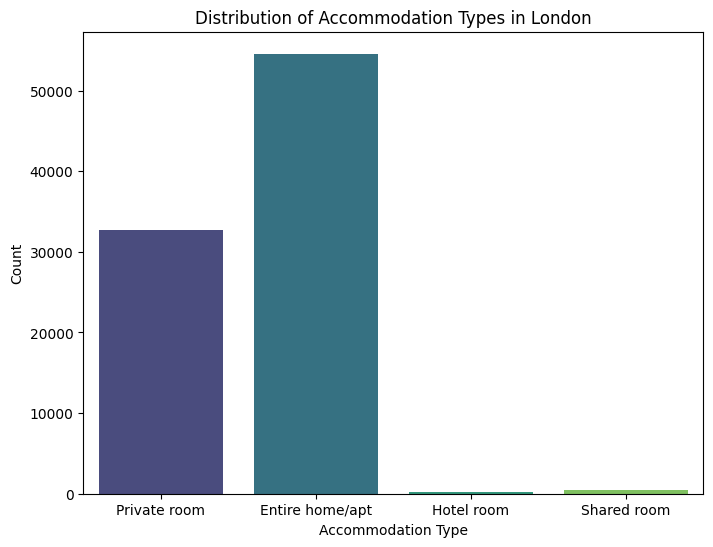

In [3]:
# No additional preprocessing needed for this question
clean_data_q2 = data[['room_type']].dropna()

# Plot settings for better readability
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=clean_data_q2, palette='viridis')
plt.title('Distribution of Accommodation Types in London')
plt.xlabel('Accommodation Type')
plt.ylabel('Count')

# Show the plot
plt.show()

The distribution of accommodation types in London shows how different types (entire home/apt, private room, etc.) are represented in the dataset.

This can provide insights into the diversity of options available to users.

## Question 3: What is the average number of reviews per neighborhood?



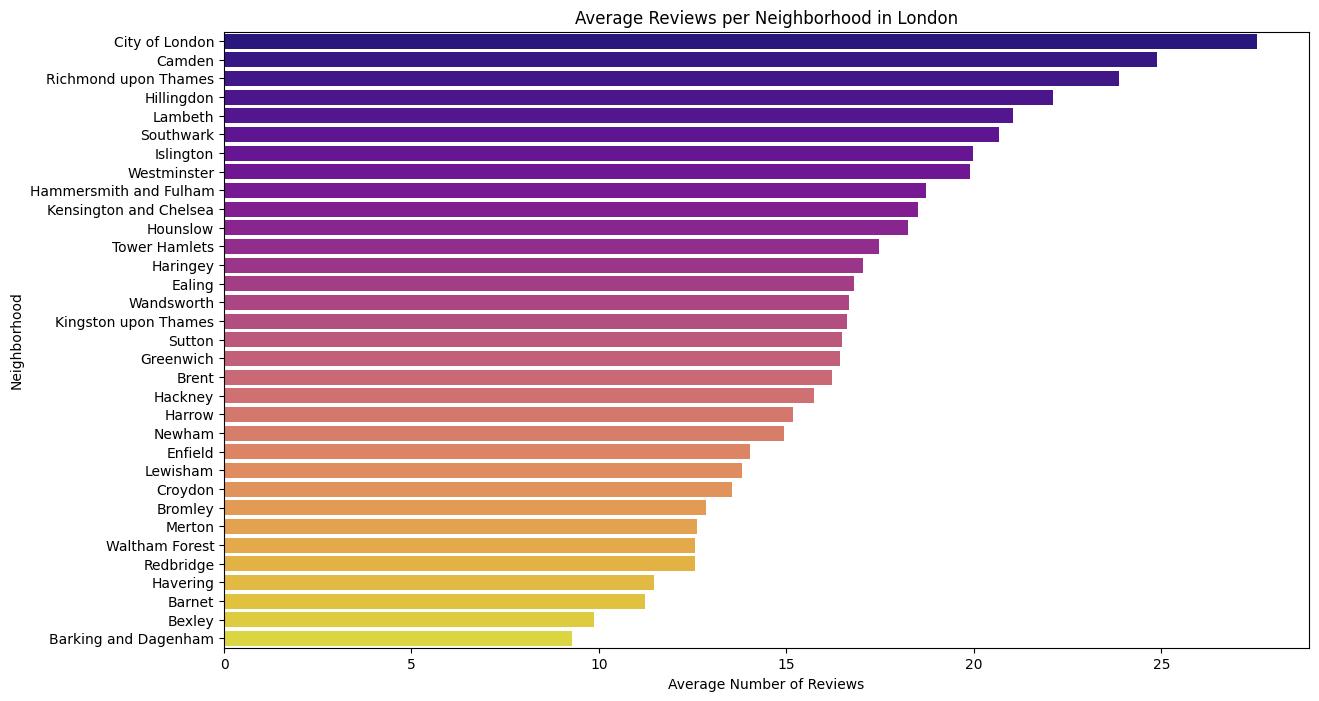

In [4]:
# Select relevant columns
clean_data_q3 = data[['neighbourhood', 'number_of_reviews']].dropna()

# Calculate the average reviews per neighborhood
average_reviews_by_neighbourhood = clean_data_q3.groupby('neighbourhood')['number_of_reviews'].mean().sort_values(ascending=False)

# Improve the plot
plt.figure(figsize=(14, 8))
sns.barplot(x=average_reviews_by_neighbourhood.values, y=average_reviews_by_neighbourhood.index, palette='plasma')
plt.title('Average Reviews per Neighborhood in London')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Neighborhood')

# Show the plot
plt.show()

The bar chart shows the average number of reviews per neighborhood in London.

Neighborhoods with higher bars have a higher average of reviews, indicating potential popularity or attractiveness to visitors.

## Question 4: What is the average minimum nights required per neighborhood?

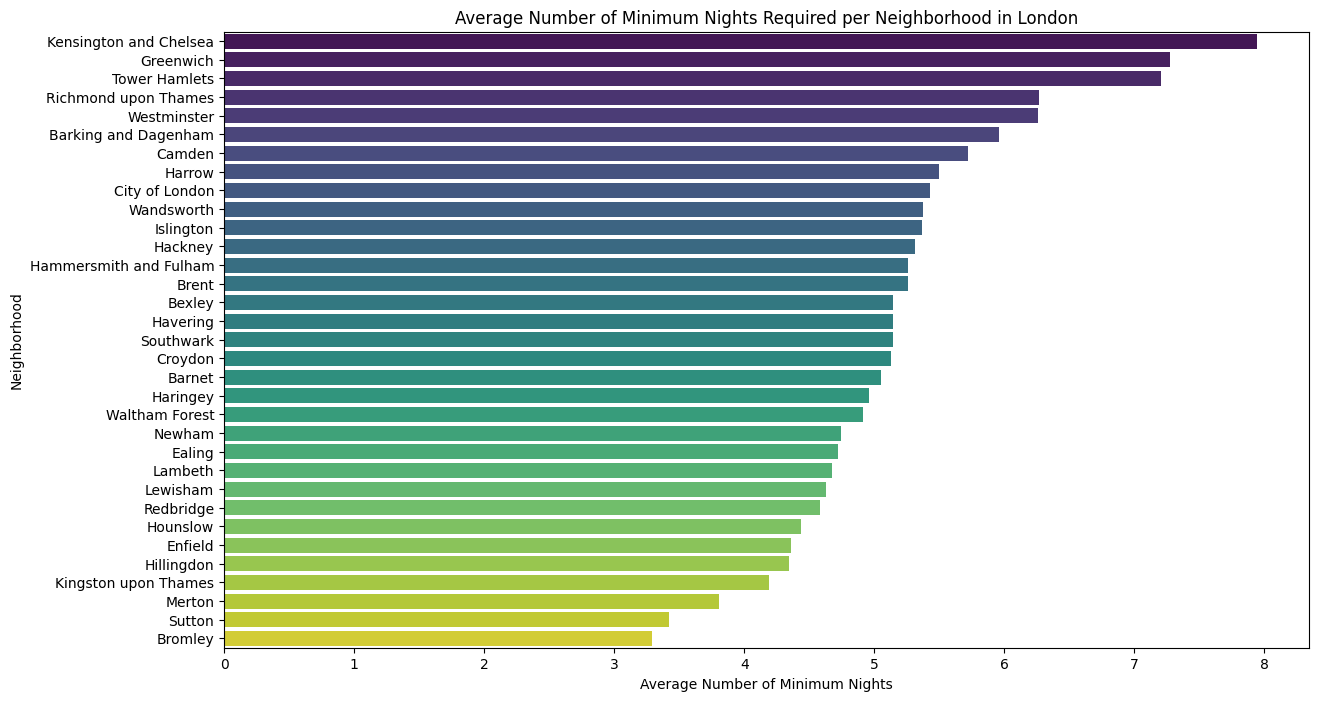

In [5]:
# Select relevant columns
clean_data_q4 = data[['neighbourhood', 'minimum_nights']].dropna()

# Calculate the average minimum nights per neighborhood
average_minimum_nights_by_neighbourhood = clean_data_q4.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)

# Improve the plot
plt.figure(figsize=(14, 8))
sns.barplot(x=average_minimum_nights_by_neighbourhood.values, y=average_minimum_nights_by_neighbourhood.index, palette='viridis')
plt.title('Average Number of Minimum Nights Required per Neighborhood in London')
plt.xlabel('Average Number of Minimum Nights')
plt.ylabel('Neighborhood')

# Show the plot
plt.show()

The bar chart presents the average number of minimum nights required per neighborhood in London. Neighborhoods with higher bars indicate a higher average requirement of minimum nights for accommodations in those locations.

## Question 5: What is the relationship between price and the number of reviews?



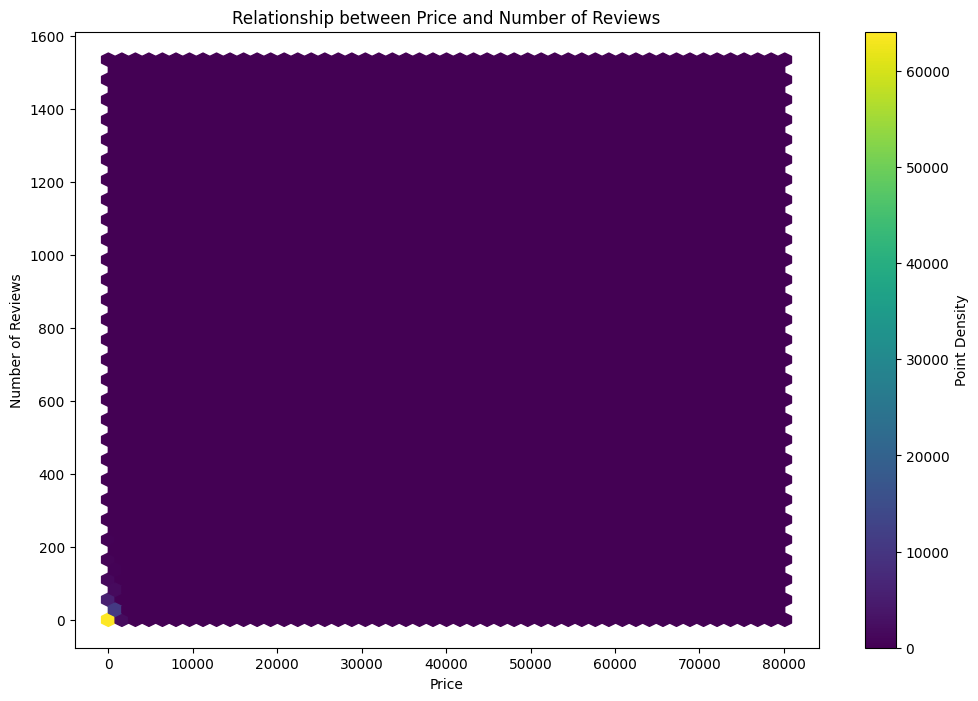


Correlation between Price and Number of Reviews: -0.04


In [7]:
# Select relevant columns
clean_data_q5 = data[['price', 'number_of_reviews']].dropna()

# Hexbin scatter plot to visualize the relationship between price and number of reviews
plt.figure(figsize=(12, 8))
plt.hexbin(x=clean_data_q5['price'], y=clean_data_q5['number_of_reviews'], gridsize=50, cmap='viridis')
plt.title('Relationship between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.colorbar(label='Point Density')
plt.show()

# Show the plot
plt.show()

# Calculate the correlation between price and number of reviews
correlation_q5 = clean_data_q5['price'].corr(clean_data_q5['number_of_reviews'])
print(f'\nCorrelation between Price and Number of Reviews: {correlation_q5:.2f}')

The scatter plot shows the relationship between accommodation prices and the number of reviews received.
Each point on the plot represents an accommodation, and the transparency of points helps identify denser areas. The correlation between price and the number of reviews is calculated and presented as a number.

If the number is positive, there is a positive correlation, indicating that more expensive accommodations tend to receive more reviews.

## Question 6: How does availability vary throughout the year?


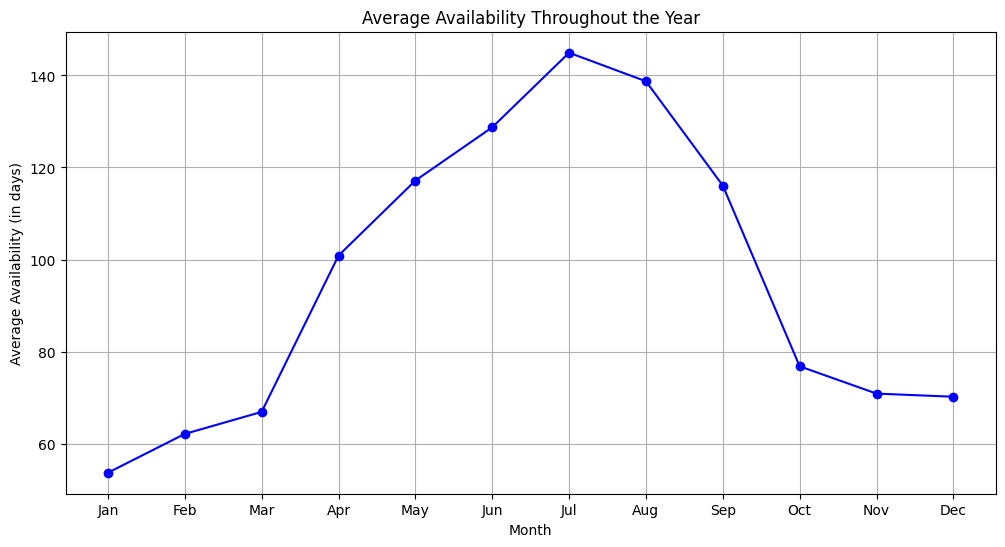

In [8]:
# Convert 'last_review' to date format
data['last_review'] = pd.to_datetime(data['last_review'])
# Extract the month from the 'last_review' column
data['last_review_month'] = data['last_review'].dt.month

# Calculate the average availability per month
availability_by_month = data.groupby('last_review_month')['availability_365'].mean()

# Plot a line chart to visualize the variation in availability throughout the year
plt.figure(figsize=(12, 6))
availability_by_month.plot(marker='o', linestyle='-', color='b')
plt.title('Average Availability Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Average Availability (in days)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


The line chart shows how the average availability of accommodations varies throughout the year.

Each point on the chart represents a month, and the line connects these points, indicating the trend over the months.

This visualization can help identify seasonal patterns in accommodation availability.

## Question 7: Is there a seasonal trend in accommodation prices?

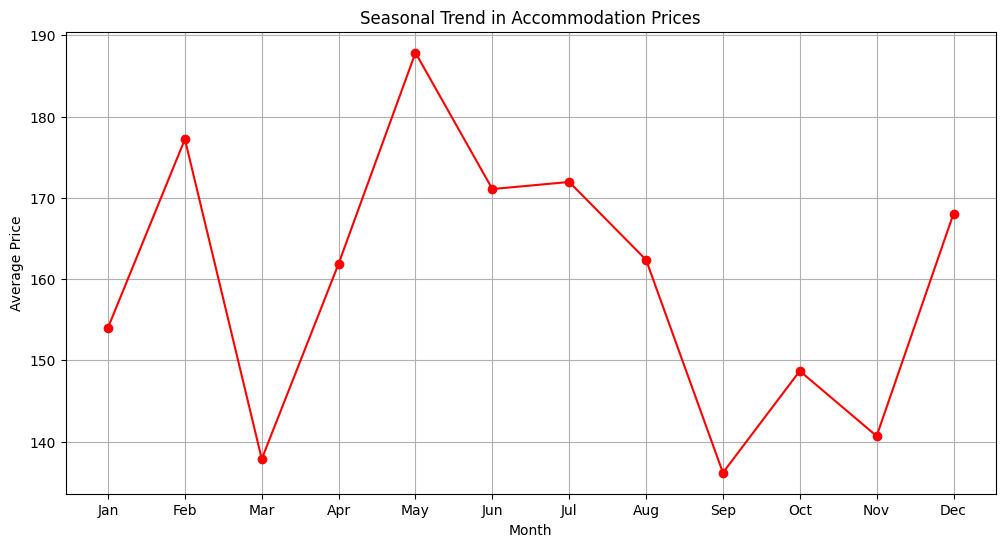

In [9]:
# Convert 'last_review' to date format
data['last_review'] = pd.to_datetime(data['last_review'])
# Extract the month from the 'last_review' column
data['last_review_month'] = data['last_review'].dt.month

# Calculate the seasonal trend in prices
monthly_price_trend = data.groupby('last_review_month')['price'].mean()

# Plot a line chart to visualize the seasonal trend in prices
plt.figure(figsize=(12, 6))
monthly_price_trend.plot(marker='o', linestyle='-', color='r')
plt.title('Seasonal Trend in Accommodation Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The line chart presents the seasonal trend in average accommodation prices throughout the year.

Each point on the chart represents a month, and the line connects these points, showing how prices vary seasonally.

This visualization can be useful to identify periods of price increase or decrease in accommodations.

## Question 8: What is the distribution of availability throughout the year?



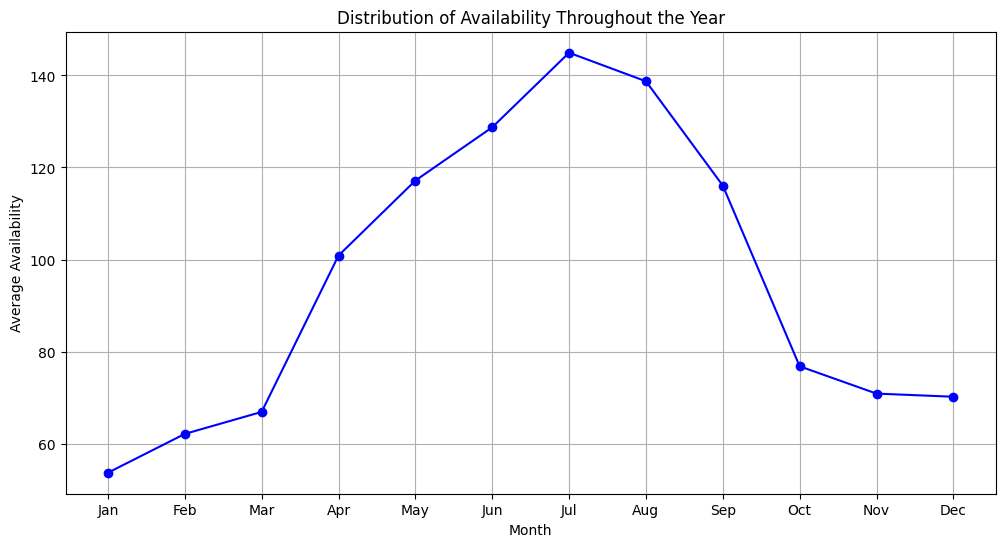

In [10]:
# Convert 'last_review' to date format
data['last_review'] = pd.to_datetime(data['last_review'])
# Extract the month from the 'last_review' column
data['last_review_month'] = data['last_review'].dt.month

# Calculate the average availability per month
availability_by_month = data.groupby('last_review_month')['availability_365'].mean()

# Plot a line chart to visualize the distribution of availability throughout the year
plt.figure(figsize=(12, 6))
availability_by_month.plot(marker='o', linestyle='-', color='b')
plt.title('Distribution of Availability Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Average Availability')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The line chart shows the distribution of average accommodation availability throughout the year.

Each point on the chart represents a month, and the line connects these points, indicating how availability varies seasonally.

This visualization can help identify patterns in accommodation availability over the course of the year.

## Question 9: What is the relationship between price and location (latitude and longitude)?



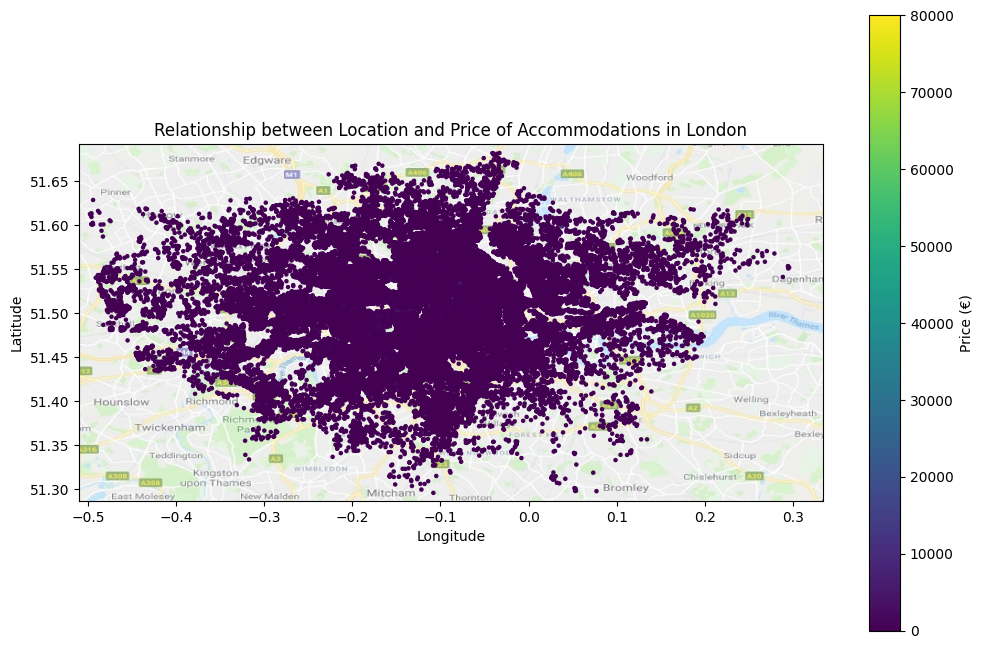

In [17]:
import numpy as np
from PIL import Image
import requests
import io

# Open the image of the London map from the URL
url = 'https://github.com/EduardoQuero/Cases/raw/main/londres-mapa.jpg'
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

# Convert the image to a numpy array
london_map = np.array(img)

# Example London bounds (replace these with the actual coordinates)
london_bounds = [(51.2867602, -0.510375), (51.6918741, 0.3340155)]

# Scatter plot to visualize the relationship between latitude, longitude, and price
plt.figure(figsize=(12, 8))
plt.imshow(london_map, extent=[london_bounds[0][1], london_bounds[1][1], london_bounds[0][0], london_bounds[1][0]], alpha=0.7)

# Add points on the map
scatter = plt.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=5, data=data)

# Add legend
plt.colorbar(scatter, label='Price (€)')

plt.title('Relationship between Location and Price of Accommodations in London')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

## Question 10: What is the average price for different types of accommodation (room_type)?



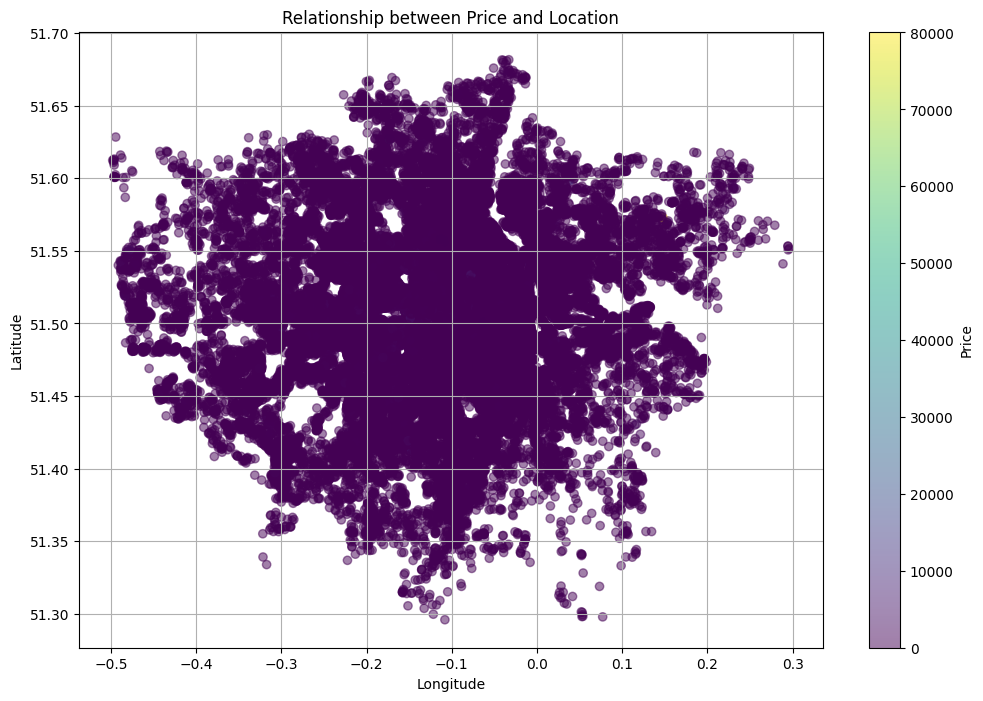

In [18]:
# Selecting relevant columns
location_data = data[['latitude', 'longitude', 'price']].dropna()

# Scatter plot to visualize the relationship between price and location
plt.figure(figsize=(12, 8))
plt.scatter(location_data['longitude'], location_data['latitude'], c=location_data['price'], cmap='viridis', alpha=0.5)
plt.title('Relationship between Price and Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.grid(True)
plt.show()


The scatter plot shows the relationship between the price of accommodations and their geographic location.

Each point on the plot represents an accommodation, with the color indicating the price.

This allows for a spatial visualization of prices, highlighting areas with higher or lower prices.


## Conclusion


1. **Distribution of Accommodation Types:**
   - The distribution of accommodation types (room_type) reveals the variety of options available to users, providing a comprehensive view of the lodging landscape in London.

2. **Reviews by Neighborhood:**
   - The average number of reviews per neighborhood highlights areas that may be more popular among guests, influencing booking decisions.

3. **Minimum Nights Requirement by Neighborhood:**
   - Understanding the average minimum nights required per neighborhood helps comprehend reservation policies in different areas, affecting flexibility for guests.

4. **Price-Review Relationship:**
   - Exploring the relationship between price and the number of reviews may unveil guest behavior patterns, indicating whether higher prices correlate with increased or decreased popularity.

5. **Availability Throughout the Year:**
   - The analysis of accommodation availability throughout the year identifies periods of high demand or low occupancy, essential for pricing planning and marketing strategies.

6. **Seasonal Price Trends:**
   - Investigating seasonal trends in prices is crucial for adjusting pricing strategies based on periods of high or low demand, directly impacting revenue.

7. **Availability Distribution Throughout the Year:**
   - Understanding how availability is distributed throughout the year aids in occupancy management and identifying opportunities to maximize revenue.

8. **Location-Price Relationship:**
   - Analyzing the relationship between price and location (latitude and longitude) helps identify geographic areas with higher or lower prices.

9. **Outlier Analysis:**
   - The identification and analysis of outliers in the data can provide insights into unique properties, pricing exceptions, or opportunities for improvement in service quality.

10. **Economic Impact:**
    - Evaluating the economic impact of the hospitality sector in London, considering factors such as total revenue, average occupancy, and geographic distribution of accommodations.